# Object Detection

La *detección de objetos* es una forma de Computer Vision en la que un modelo de aprendizaje automático se entrena para clasificar instancias individuales de objetos en una imagen e incluir un *cuadro de límite* que marque su ubicación. Se puede considerar una evolución de la *clasificación de imágenes* (en la que el modelo responde a la pregunta “¿de qué es esta imagen?”) hacia la creación de soluciones en las que el modelo responda a la pregunta “¿qué objetos aparecen en esta imagen y dónde están?”.

![Un robot identificando fruta](../images/object-detection.jpg)

Por ejemplo, una tienda podría usar un modelo de detección de objetos para implementar un sistema de pago automático que escanee una cinta transportadora con una cámara y que identifique los artículos sobre ella sin tener que colocar cada uno de ellos y escanearlos individualmente.

**Custom Vision**, de Cognitive Services en Microsoft Azure, es una solución basada en la nube para crear y publicar modelos personalizados de detección de objetos.

## Crear un recurso de Custom Vision

Para usar el servicio Custom Vision, necesita un recurso de Azure que pueda usar para entrenar un modelo, y un recurso con el que publicarlo para que las aplicaciones lo usen. Puede usar el mismo recurso para cada una de estas tareas o usar recursos diferentes para que se asignen los costes de forma independiente, siempre que los recursos se hayan creado en la misma región. El recurso de cada una (o ambas) de las tareas pueden ser un recurso general de **Cognitive Services** o un recurso específico de **Custom Vision**. Use estas instrucciones para crear un nuevo recurso de **Custom Vision** (o puede usar un recurso existente, si ya tiene uno).

1. En una nueva pestaña del navegador, abra Azure Portal ([https://portal.azure.com](https://portal.azure.com)) e inicie sesión con la cuenta de Microsoft asociada a su suscripción de Azure.
2. Haga clic en el botón **&#65291;Crear un recurso**, busque *Custom Vision* y cree un recurso de **Custom Vision** con esta configuración:
    - **Opciones de creación**: ambas
    - **Suscripción**: *su suscripción de Azure*
    - **Grupo de recursos**: *seleccione o cree un grupo de recursos con un nombre único*
    - **Nombre**: *escriba un nombre único*
    - **Ubicación de entrenamiento**: *seleccione cualquier región disponible*
    - **Plan de tarifa de entrenamiento**: F0
    - **Ubicación de la predicción**: *la misma que la ubicación de entrenamiento*
    - **Plan de tarifa de predicción**: F0

    > **Nota**: Si ya tiene un servicio Custom Vision F0 en su suscripción, seleccione **S0** en este caso.

3. Espere a que el recurso se cree.

## Crear un proyecto de Custom Vision

Para entrenar un modelo de detección de objetos, debe crear un proyecto de Custom Vision basado en su recurso de entrenamiento. Para hacerlo, debe usar el portal de Custom Vision.

1. En una nueva pestaña del navegador, abra el portal de Custom Vision ([https://customvision.ai](https://customvision.ai)) e inicie sesión con la cuenta de Microsoft asociada a su suscripción de Azure.
2. Cree un nuevo proyecto con la siguiente configuración:
    - **Name**: Grocery Detection
    - **Description**: Object detection for groceries.
    - **Resource**: *The Custom Vision resource you created previously*
    - **Project Types**: Object Detection
    - **Domains**: General
3. Espere a que se cree el proyecto y se abra en el navegador.

## Agregar y etiquetar imágenes

Para entrenar un modelo de detección de objetos, debe cargar imágenes que contengan las clases el modelo tendrá que identificar y etiquetarlas para indicar los cuadros de límite de cada instancia de objeto.

1. Descargue y extraiga las imágenes de entrenamiento de https://aka.ms/fruit-objects. La carpeta extraída contiene una recopilación de imágenes de fruta.
2. En el portal de Custom Vision, en el proyecto de detección de objetos, seleccione **Add images** y cargue todas las imágenes de la carpeta extraída.
3. Una vez cargadas las imágenes, seleccione la primera para abrirla.
4. Pase el cursor sobre cualquier objeto de la imagen hasta que aparezca una región detectada automáticamente, tal y como aparece en la imagen siguiente. Después, seleccione el objeto y, si es necesario, cambie el tamaño de la región para rodearlo.

![La región predeterminada de un objeto](../images/object-region.jpg)

De forma alternativa, puede arrastrar el cursor alrededor del objeto para crear una región.

5. Cuando la región rodee el objeto, agregue una nueva etiqueta con el tipo de objeto adecuado (*apple*, *banana* u *orange*), tal y como aparece aquí:

![Un objeto etiquetado en una imagen](../images/object-tag.jpg)

6. Seleccione y etiquete cada objeto de la imagen, modifique el tamaño de las regiones y agregue nuevas etiquetas si es necesario.

![Dos objetos etiquetados en una imagen](../images/object-tags.jpg)

7. Use el vínculo **>** de la derecha para pasar a la siguiente imagen y etiquetar sus objetos. Haga lo mismo con el resto de imágenes, etiquete cada manzana, banana y naranja.

8. Cuando haya terminado de etiquetar la última imagen, cierre el editor **Image Detail** y, en la página **Training Images**, en **Tags**, seleccione **Tagged** para ver todas las imágenes etiquetadas:

![Imágenes etiquetadas en un proyecto](../images/tagged-images.jpg)

## Entrenar y probar un modelo

Ahora que hemos etiquetado las imágenes del proyecto, es hora de entrenar un modelo.

1. En el proyecto de Custom Vision, haga clic en **Train** para entrenar un modelo de detección de objetos con las imágenes etiquetadas. Seleccione la opción **Quick Training**.
2. Espere a que se complete el entrenamiento (puede tardar alrededor de 10 minutos) y compruebe las métricas de rendimiento *Precision*, *Recall* y *mAP* (miden la precisión de la predicción del modelo de clasificación y sus valores deberían ser altos).
3. En la esquina superior derecha de la página, haga clic en **Quick Test** y, después, en el cuadro **URL de imagen**, escriba `https://aka.ms/apple-orange` y vea la predicción que se obtiene. Después, cierre la ventana **Quick Test**.

## Publicar y consumir el modelo de detección de objetos

Ya puede publicar su modelo entrenado y usarlo desde una aplicación de cliente.

1. En la parte superior izquierda de la página **Performance**, haga clic en **&#128504; Publish** para publicar el modelo entrenado con la siguiente configuración:
    - **Model name**: detect-produce
    - **Prediction Resource**: *Su recurso de **predicción** de Custom Vision*

### (!) Comprobar 
¿Ha usado el mismo nombre de modelo: **detect-produce**? 

2. Después de publicarlo, haga clic en el icono *Settings* (&#9881;) en la esquina superior derecha de la página **Performance** para ver la configuración del proyecto. Después, en **General** (a la izquierda), copie el **Project Id**. Vaya hacia abajo y péguelo en la celda de código debajo del paso 5, en sustitución de **YOUR_PROJECT_ID**. 

> (*Si usó un recurso de **Cognitive Services** en lugar de crear un recurso de **Custom Vision** al principio del ejercicio, puede copiar su clave y punto de conexión desde el lado derecho de la configuración del proyecto, péguelos en la celda de código que aparece más abajo y ejecútela para ver los resultados. Si no es así, siga los pasos que quedan para obtener la clave y el punto de conexión de su recurso de predicción de Custom Vision*).

3. En la parte superior izquierda de la página **Project Settings**, haga clic en el icono *Projects Gallery* (&#128065;) para volver a la página principal del portal de Custom Vision, donde debería aparecer su proyecto.

4. En la página principal del portal de Custom Vision, en la esquina superior derecha, haga clic en el icono *Settings* (&#9881;) para ver la configuración de su servicio Custom Vision. Después, en **Resources**, abra su recurso de *predicción* (<u>no</u> el recurso de entrenamiento) y copie sus valores para **Key** y **Endpoint** en la celda de código que aparece debajo del paso 5, en sustitución de **YOUR_KEY** y **YOUR_ENDPOINT**.

### (!) Comprobar 
Si utiliza un recurso de **Custom Vision**, ¿ha usado el recurso de **predicción** (y <u>no</u> el recurso de entrenamiento)?

5. Para establecer las variables de su ID de proyecto, clave y punto de conexión, haga clic en el botón Run Cell <span>&#9655;</span> (en la parte superior izquierda de la celda siguiente) y ejecute su código.

## Instalamos la biblioteca de Custom Vision

In [1]:
!pip install --upgrade azure-cognitiveservices-vision-customvision

Requirement already up-to-date: azure-cognitiveservices-vision-customvision in /anaconda/envs/azureml_py36/lib/python3.6/site-packages (3.1.0)


## Asignamos nuestras credenciales
* obtenidas del portal de Custom Vision

In [2]:
project_id = '' # Reemplazar por el id. de proyecto
key = '' # Reemplazar por la clave principal del recurso de predicción
endpoint = '' # Reemplazar por el punto de conexión del recurso de predicción

model_name = 'detect-produce' # esto debe coincidir exactamente con el nombre del modelo establecido al publicar la iteración del modelo (distingue mayúsculas de minúsculas).
print('Ready to predict using model {} in project {}'.format(model_name, project_id))

Ready to predict using model detect-produce in project f1008f13-0224-4fd4-b857-c6f16749e62b


Ahora, puede usar su clave y punto de conexión con un cliente de Custom Vision para conectarse a su modelo de detección de objetos de Custom Vision.

Ejecute la siguiente celda de código, que utiliza su modelo para detectar artículos individuales en una imagen.

> **Nota**: No se preocupe demasiado por los detalles del código. Utiliza el SDK de Python para que el servicio Custom Vision envíe una imagen a su modelo y recupere predicciones de los objetos detectados. Cada predicción tiene un nombre de clase (en este ejemplo *apple*, *banana* u *orange*) y las coordenadas del *cuadro de límite* que indican en qué parte de la imagen se ha detectado el objeto. Después, el código usa esta información para crear un cuadro etiquetado alrededor de cada objeto de la imagen.

## Importamos las Bibliotecas

In [3]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import os
%matplotlib inline

## Autenticamos nuestro cliente

In [4]:
# Obtener un cliente de predicción del modelo de detección de objetos
credentials = ApiKeyCredentials(in_headers={"Prediction-key": key})
predictor = CustomVisionPredictionClient(endpoint=endpoint, credentials=credentials)

## Cargamos la imagen a nuestro notebook

In [6]:
# Cargar una imagen de prueba y obtener sus dimensiones
test_img_file = os.path.join('../data', 'object-detection', 'produce.jpg')
test_img = Image.open(test_img_file)
test_img_h, test_img_w, test_img_ch = np.array(test_img).shape

print('Detecting objects in {} using model {} in project {}...'.format(test_img_file, model_name, project_id))

Detecting objects in ../data/object-detection/produce.jpg using model detect-produce in project f1008f13-0224-4fd4-b857-c6f16749e62b...


## Detección de objetos en la Imagen

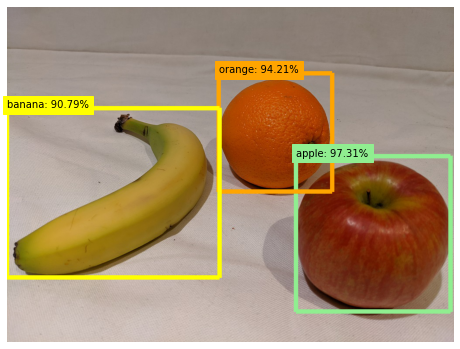

In [7]:
# Detectar objetos de la imagen de prueba
with open(test_img_file, mode="rb") as test_data:
    results = predictor.detect_image(project_id, model_name, test_data)

# Crear una figura para mostrar los resultados
fig = plt.figure(figsize=(8, 8))
plt.axis('off')

# Mostrar la imagen con cuadros alrededor de cada objeto detectado
draw = ImageDraw.Draw(test_img)
lineWidth = int(np.array(test_img).shape[1]/100)
object_colors = {
    "apple": "lightgreen",
    "banana": "yellow",
    "orange": "orange"
}
for prediction in results.predictions:
    color = 'white' # valor predeterminado para las etiquetas de objeto 'other'
    if (prediction.probability*100) > 50:
        if prediction.tag_name in object_colors:
            color = object_colors[prediction.tag_name]
        left = prediction.bounding_box.left * test_img_w 
        top = prediction.bounding_box.top * test_img_h 
        height = prediction.bounding_box.height * test_img_h
        width =  prediction.bounding_box.width * test_img_w
        points = ((left,top), (left+width,top), (left+width,top+height), (left,top+height),(left,top))
        draw.line(points, fill=color, width=lineWidth)
        plt.annotate(prediction.tag_name + ": {0:.2f}%".format(prediction.probability * 100),(left,top), backgroundcolor=color)
plt.imshow(test_img)


Consulte las predicciones, que muestran los objetos detectados y las probabilidades de cada predicción.